# Milestone 2

## Introduction

=================================================

Milestone 2 - Machine Learning

Nama  : Sekar Meulu Mahrannisa  
Batch : HCK-031

Program ini berisi proses yang bertujuan:

- Membangun model klasifikasi supervised machine learning untuk memprediksi apakah suatu DNA sequence memiliki mutation_flag (0/1).

- Mengevaluasi performa beberapa algoritma (misalnya Logistic Regression, Decision Tree, Random Forest) dalam mendeteksi mutasi.

- Mengidentifikasi fitur-fitur penting (misalnya GC Content, AT Content, k-mer patterns) yang berkontribusi terhadap terjadinya mutasi.


=================================================

### Background

DNA sequence analysis merupakan salah satu bidang penting dalam bioinformatika untuk memahami struktur genetik, mendeteksi mutasi, dan memprediksi risiko penyakit. Adanya mutasi pada DNA dapat memengaruhi fungsi biologis suatu organisme, sehingga identifikasi mutasi secara cepat dan akurat sangat dibutuhkan. Dengan memanfaatkan machine learning, kita dapat membangun model klasifikasi untuk memprediksi apakah suatu DNA sequence mengandung mutasi atau tidak, berdasarkan berbagai fitur biologis (GC/AT content, panjang DNA, distribusi basa, dan pola k-mer).

### Problem Statement

Sebagai seorang Data Scientist di OXE Corp, saya ingin mengembangkan sistem flagging mutasi DNA untuk mempercepat proses identifikasi mutasi yang selama ini membutuhkan analisis laboratorium yang mahal dan lama. Dengan memanfaatkan machine learning, sistem ini dapat secara otomatis memprediksi apakah suatu DNA sequence memiliki mutasi atau tidak, sehingga membantu peneliti dalam deteksi dini risiko penyakit, resistensi mikroba, maupun stabilitas genetik, sekaligus meningkatkan efisiensi riset genomik.


### SMART Framework
| **SMART**    | **Deskripsi**                                                                                                                                      |
|--------------|----------------------------------------------------------------------------------------------------------------------------------------------------|
| **Specific** | Mengembangkan model klasifikasi untuk memprediksi keberadaan mutasi dalam DNA sequence berdasarkan fitur statistik dan komposisi basa.             |
| **Measurable** | Keberhasilan diukur melalui metrik klasifikasi seperti accuracy, precision, recall, dan F1-score.                                                 |
| **Achievable** | Dataset berisi 3,000 sampel dengan 13 fitur yang cukup representatif untuk membangun model machine learning baseline.                             |
| **Relevant** | Prediksi mutasi DNA relevan dalam konteks diagnostik penyakit, bioteknologi, dan riset bioinformatika.                                             |
| **Time-bound** | Studi ini dapat diselesaikan dalam jangka pendek (misalnya 2–4 minggu) mulai dari eksplorasi data, preprocessing, pelatihan model, hingga evaluasi. |


### Dataset
Dataset ini berisi 3.000 sampel DNA dari berbagai organisme (manusia, bakteri, virus, dan tumbuhan). Setiap sampel dilengkapi dengan informasi biologis seperti komposisi basa, panjang DNA, pola k-mer, serta indikator mutasi. Data ini digunakan untuk menganalisis hubungan karakteristik DNA dengan mutasi, sekaligus membangun model machine learning untuk memprediksi risiko mutasi.

Penjelasan singkat isi dataset:
| **Kolom**          | **Deskripsi**                                                                 |
|---------------------|-------------------------------------------------------------------------------|
| Sample_ID           | Identitas unik untuk setiap sampel DNA                                        |
| Sequence            | Urutan DNA (string terdiri dari A, T, C, G)                                   |
| GC_Content          | Persentase Guanin (G) dan Sitosin (C) dalam urutan DNA                       |
| AT_Content          | Persentase Adenin (A) dan Timin (T) dalam urutan DNA                         |
| Sequence_Length     | Panjang total urutan DNA                                                      |
| Num_A               | Jumlah basa Adenin                                                            |
| Num_T               | Jumlah basa Timin                                                             |
| Num_C               | Jumlah basa Sitosin                                                           |
| Num_G               | Jumlah basa Guanin                                                            |
| kmer_3_freq         | Rata-rata frekuensi 3-mer (triplet, misalnya `ATG`, `CGA`) dalam urutan DNA. <br> Penting karena pola triplet membantu membedakan organisme, mendeteksi mutasi, dan mengidentifikasi ciri biologis. |
| Mutation_Flag       | Penanda biner keberadaan mutasi (0 = Tidak, 1 = Ya)                           |
| Class_Label         | Kelas sampel (Manusia, Bakteri, Virus, Tanaman)                               |
| Disease_Risk        | Tingkat risiko penyakit terkait sampel (Rendah / Sedang / Tinggi)             |

`source: https://www.kaggle.com/datasets/miadul/dna-classification-dataset?resource=download`

## Import Libraries

In [407]:

# Data manipulation and mathematics operation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Stats library
from scipy.stats import kendalltau

# Data preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Model definition
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_auc_score

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
# Model saving
import pickle

## Data Loading

In [408]:
# Load Dataset

df = pd.read_csv('P1M2_Sekar_dataset.csv')

# summary data
print(df.info())

# 10 data pertama
print("\n10 Data Pertama : ")
display(df.head(10))

# 10 data terakhir
print("10 Data Terakhir :")
display(df.tail(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_ID        3000 non-null   object 
 1   Sequence         3000 non-null   object 
 2   GC_Content       3000 non-null   float64
 3   AT_Content       3000 non-null   float64
 4   Sequence_Length  3000 non-null   int64  
 5   Num_A            3000 non-null   int64  
 6   Num_T            3000 non-null   int64  
 7   Num_C            3000 non-null   int64  
 8   Num_G            3000 non-null   int64  
 9   kmer_3_freq      3000 non-null   float64
 10  Mutation_Flag    3000 non-null   int64  
 11  Class_Label      3000 non-null   object 
 12  Disease_Risk     3000 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 304.8+ KB
None

10 Data Pertama : 


,Sample_ID,Sequence,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label,Disease_Risk
0,SAMPLE_1,CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCGCAGACAGACTTTAAAACGAACCTTGCGGCAATTGCGGGCGAGAAGTTGGCTTAG,50.0,50.0,100,22,28,19,31,0.986,0,Bacteria,High
1,SAMPLE_2,TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCACAACATTTTTAGATAATAGGCCGCGTTGTCTACGAAACTCAGCCGGCACGTTGC,45.0,55.0,100,27,28,22,23,0.486,1,Virus,Medium
2,SAMPLE_3,GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTAGGGTAGACTCCCTCGAACATGTTGGCATTAAGACTTCTCCGCACCCCAACCACC,51.0,49.0,100,26,23,30,21,0.367,1,Bacteria,Low
3,SAMPLE_4,ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTGAACGCATGGGACCCGCCTTGGAGGTTTAGATCAGTCATCCGGCGAAGTGAGGGA,55.0,45.0,100,28,17,23,32,0.404,0,Human,Medium
4,SAMPLE_5,TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTTCCTCGGAATATAGGGTACCAACATCATACTTTGCGGCAGCTGATGGCCTATAGC,46.0,54.0,100,24,30,25,21,0.818,0,Human,High
5,SAMPLE_6,GCGGCTTGTTATCCTGGCAACGCGTTCAACGTCTCAGCACAGTAACTCCTAAAATCAACTCTGATGTTGATTCGAATAGCTTCAAAACCAATGCAAGTGC,45.0,55.0,100,29,26,26,19,0.495,1,Plant,Low
6,SAMPLE_7,ACGTTGACGTAAGCACTCCTCAATGCACCCCTGCCTTCGCCCTTTCCCCGCGCGACTTGTCTGGAGGTGGATGTTCCCAGTCGTGCGTCGCTTGCGGGTC,62.0,38.0,100,12,26,35,27,0.570,1,Bacteria,High
7,SAMPLE_8,ACCGTCCAGAACTAACAAACCGGTGACGAATTGTCGTCATGTCTCTAAATCGCTGTGTATTAAGACTGTTTTGGACACGGAAGGTTGCCGAGCATCTTTC,46.0,54.0,100,26,28,23,23,0.420,0,Virus,Low
8,SAMPLE_9,GATTAATGACGCCAATTCTCGGGTCCCATAATTCTCGTAAATAAAATGAACACGTTATCGACGTATGAGAGTCAACGAATGTGGAGGAACGCTTAGTGTC,42.0,58.0,100,32,26,19,23,0.935,1,Human,Low
9,SAMPLE_10,GCCCCTGGTCACGCTGTGTACAGCAGCGGACGTTTAACCGCAGCAGATCATCTAATTGCAGTTCCGTAGGTCCCTTGGGTTCTCGCAGGGCCCTGCGCAA,59.0,41.0,100,18,23,31,28,0.606,1,Bacteria,Low


10 Data Terakhir :


,Sample_ID,Sequence,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label,Disease_Risk
2990,SAMPLE_2991,ACCTCACGAAGCCCAGAGTTCCCTTGTTTGCCTTCTCGGTTAAGCATACTCTAGACTCTCTCGCCCAACCTGGAAGGACTTGGGAGCGTCGGGGCGGCAA,57.0,43.0,100,20,23,31,26,0.150,1,Bacteria,Medium
2991,SAMPLE_2992,CTCTATTCATATTGAAAATAATATTCCTTGATGCCTCAATGTAAGCACTAGCTGATCAATGTTTCCGCAATGCGATCGGGTCAGGAGGCCCACCAATGGC,44.0,56.0,100,28,28,24,20,0.384,0,Virus,Medium
2992,SAMPLE_2993,ATGAAGCATGACACCCTGGCCATGTATGGCATAAGTGGCATAAAGCGAAAACCAAAGGTTACTAGGAGGAGTCCGATACAAAGCAACCCCGGAGGAGACC,50.0,50.0,100,36,14,23,27,0.486,0,Bacteria,High
2993,SAMPLE_2994,GGAGAAAGCATAGACTGCAGGGTCGCATCCTCAAGCAACGCAATTTTATTATGGGGTTATTCTAAGCTTTGGGATCGGGCTGAATGACGTTTCGCCGCGT,49.0,51.0,100,24,27,20,29,0.542,1,Bacteria,High
2994,SAMPLE_2995,GACCAAGTCCTGGTACCTCGCTTAACTGTTCCTCCGCAAATATAGCCCCCGAGTCGGACCTCACGGATTTACGGATTAAAATCACCTTTGCGTTAGTCAC,50.0,50.0,100,24,26,31,19,0.756,1,Virus,High
2995,SAMPLE_2996,GATCAGCCCATACACCAAATCAATTGCATACATGTCCGATGTAACATGAGGTTCGTTCCACCACTTATTTATAGGCCTTAGTAGACCCAAGAGGCGGCAC,46.0,54.0,100,30,24,27,19,0.786,1,Plant,Medium
2996,SAMPLE_2997,TGTTGTGTGTCTGATGATAGGTCATACCGCCTCGAAACATCACCATGATCAGCTCCGCGGCAAGAAAAGCCGAGTTACAGGTATCTCAGACGGAATCATG,49.0,51.0,100,28,23,24,25,0.831,0,Plant,Medium
2997,SAMPLE_2998,GACCCACTAAAAGTCTTCGTCTCCTTCCGATGGGAATTTTCGCCGACCCATTCGTCGAACACGTGGCGAGGGCTCTTGGCCAGTCTTCTATAGACTACGA,53.0,47.0,100,21,26,30,23,0.140,0,Virus,Medium
2998,SAMPLE_2999,CCAAAGGATATCTGTAATTGTTGCAGCGCCCCTACAATTTGAGCACCGCCTGACGAACTGGATAACGTCACTTGTTACTGATAGTATGTCGCTAGACTCT,46.0,54.0,100,26,28,25,21,0.685,0,Plant,Medium
2999,SAMPLE_3000,CCGGATGCCGCTCTATACACCGTCATAGCCTGGAACACACAAATAAATGTATCATAGCGTACCCCGCAGCGCATACTGCATAGAAGTATAACTAACTCAT,46.0,54.0,100,33,21,29,17,0.716,0,Plant,High


In [409]:
# Cek Duplikasi
print(f'Jumlah duplikat : {df.duplicated().sum()}')

Jumlah duplikat : 0


In [410]:
# Cek ringkasan aggregat dataset
df.describe()

,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag
count,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,50.120000,49.880000,100.0,24.950667,24.929333,25.004000,25.116000,0.547738,0.496667
std,5.062688,5.062688,0.0,4.317458,4.317702,4.349056,4.329603,0.258521,0.500072
min,34.000000,34.000000,100.0,11.000000,9.000000,10.000000,12.000000,0.100000,0.000000
25%,47.000000,47.000000,100.0,22.000000,22.000000,22.000000,22.000000,0.330000,0.000000
50%,50.000000,50.000000,100.0,25.000000,25.000000,25.000000,25.000000,0.543000,0.000000
75%,53.000000,53.000000,100.0,28.000000,28.000000,28.000000,28.000000,0.772250,1.000000
max,66.000000,66.000000,100.0,40.000000,42.000000,42.000000,42.000000,1.000000,1.000000


In [411]:
# Cek missing value
df.isnull().sum()

Sample_ID          0
Sequence           0
GC_Content         0
AT_Content         0
Sequence_Length    0
Num_A              0
Num_T              0
Num_C              0
Num_G              0
kmer_3_freq        0
Mutation_Flag      0
Class_Label        0
Disease_Risk       0
dtype: int64

## Exploratory Data Analysis

### 1. Seberapa besar proporsi sampel dengan Mutation_Flag = 1?

Proporsi Mutation Flag (%):
Mutation_Flag
0    50.333333
1    49.666667
Name: proportion, dtype: float64


/var/folders/4n/pndvm13x4y39rbqr24pwzs940000gn/T/ipykernel_1570/2670954074.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mutation_Flag', data=df, palette='viridis')


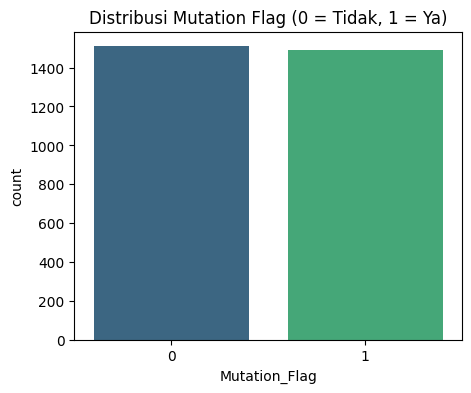

In [412]:
# 1. Proporsi sampel dengan Mutation_Flag = 1
mutation_counts = df['Mutation_Flag'].value_counts(normalize=True) * 100
print("Proporsi Mutation Flag (%):")
print(mutation_counts)

plt.figure(figsize=(5,4))
sns.countplot(x='Mutation_Flag', data=df, palette='viridis')
plt.title("Distribusi Mutation Flag (0 = Tidak, 1 = Ya)")
plt.show()

Distribusi sampel DNA yang bermutasi dan tidak bermutasi mempunyai sebaran yang hampir seimbang, yaitu 50.3% dan 49.6%.
Ini menunjukkan jumlah sampel dengan mutasi (1) dan tanpa mutasi (0) hampir seimbang. Hal ini menandakan bahwa tidak terdapat masalah serius terkait class imbalance, sehingga data sudah cukup representatif untuk digunakan dalam pembangunan model klasifikasi. Keseimbangan ini juga menguntungkan karena dapat membantu model belajar secara adil terhadap kedua kelas dan membuat evaluasi metrik seperti akurasi, precision, maupun recall menjadi lebih reliabel.

### 2. Apakah Mutation_Flag lebih sering muncul pada kelas tertentu (misalnya Virus vs Manusia)?

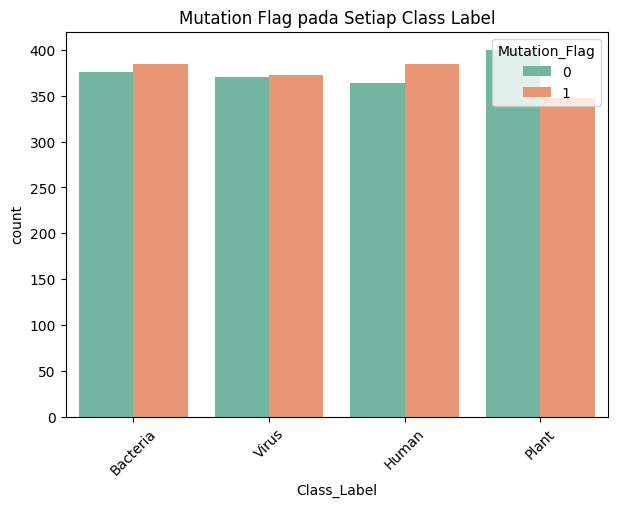

In [413]:
# 2. Mutation_Flag vs Class_Label
plt.figure(figsize=(7,5))
sns.countplot(x='Class_Label', hue='Mutation_Flag', data=df, palette='Set2')
plt.title("Mutation Flag pada Setiap Class Label")
plt.xticks(rotation=45)
plt.show()

Grafik menunjukkan distribusi Mutation_Flag pada masing-masing kelas organisme (Bacteria, Virus, Human, Plant). 
Secara umum, jumlah sampel dengan mutasi (1) dan tanpa mutasi (0) terlihat seimbang di tiap kelas, meskipun ada sedikit variasi. Pada kelas Human dan Plant, jumlah sampel dengan mutasi sedikit lebih tinggi dibanding tanpa mutasi, sementara pada Bacteria dan Virus selisihnya sangat tipis.

Mutasi dapat muncul di semua jenis organisme dengan proporsi yang relatif merata, sehingga tidak ada kelas tertentu yang dominan memiliki mutasi.

### 3. Bagaimana distribusi Disease_Risk pada sampel dengan mutasi dibandingkan yang tanpa mutasi?

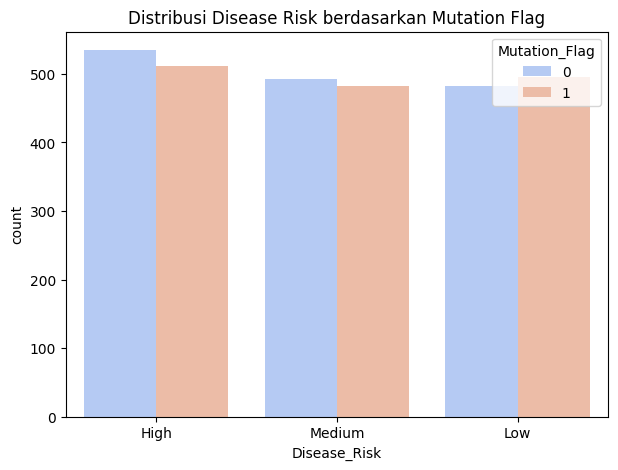


Persentase Disease Risk berdasarkan Mutation Flag:
Mutation_Flag      0      1
Disease_Risk               
High           51.15  48.85
Low            49.28  50.72
Medium         50.51  49.49


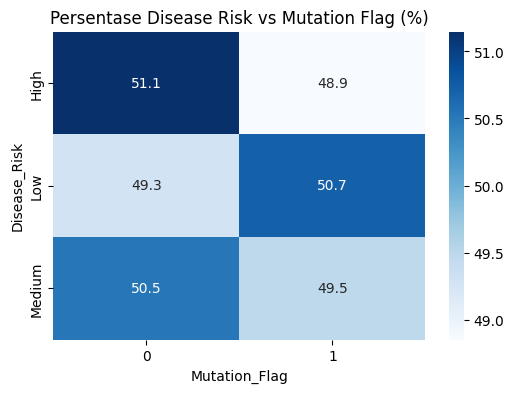

In [414]:

# 3. Distribusi Disease_Risk pada sampel dengan/ tanpa mutasi
plt.figure(figsize=(7,5))
sns.countplot(x='Disease_Risk', hue='Mutation_Flag', data=df, palette='coolwarm')
plt.title("Distribusi Disease Risk berdasarkan Mutation Flag")
plt.show()

# 4. Crosstab untuk ringkasan tabulasi
mutation_risk_table = pd.crosstab(df['Disease_Risk'], df['Mutation_Flag'], normalize='index') * 100
print("\nPersentase Disease Risk berdasarkan Mutation Flag:")
print(mutation_risk_table.round(2))

# Heatmap untuk lebih jelas
plt.figure(figsize=(6,4))
sns.heatmap(mutation_risk_table, annot=True, fmt=".1f", cmap="Blues")
plt.title("Persentase Disease Risk vs Mutation Flag (%)")
plt.show()


Grafik menunjukkan distribusi Disease_Risk (High, Medium, Low) berdasarkan Mutation_Flag. Secara umum, jumlah sampel dengan mutasi (1) dan tanpa mutasi (0) hampir sama di setiap kategori risiko penyakit. Ada sedikit perbedaan: pada risiko High, sampel tanpa mutasi sedikit lebih banyak; sementara pada risiko Low, sampel dengan mutasi sedikit lebih banyak.

Mutasi muncul pada semua tingkat risiko penyakit dengan distribusi yang relatif seimbang, sehingga keberadaan mutasi tidak hanya terbatas pada risiko tertentu, melainkan tersebar di seluruh kategori risiko.

### 4. Apakah sampel dengan GC_Content tinggi lebih sering berasosiasi dengan Disease_Risk tinggi?

/var/folders/4n/pndvm13x4y39rbqr24pwzs940000gn/T/ipykernel_1570/3351126770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Disease_Risk", y="GC_Content", data=df, palette="coolwarm")


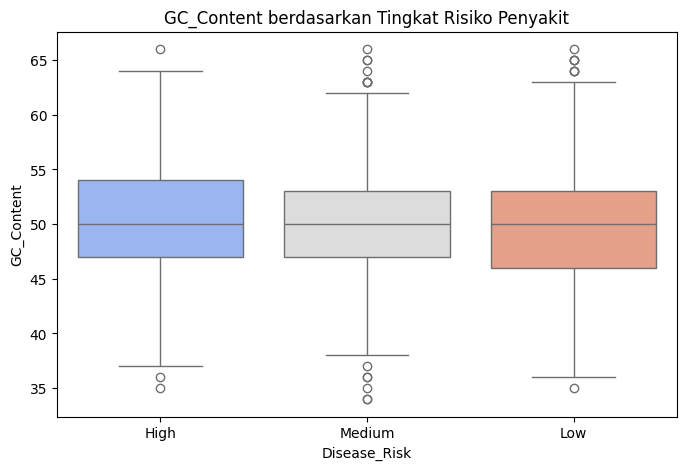

In [415]:


# Hubungan GC_Content vs Disease_Risk
plt.figure(figsize=(8,5))
sns.boxplot(x="Disease_Risk", y="GC_Content", data=df, palette="coolwarm")
plt.title("GC_Content berdasarkan Tingkat Risiko Penyakit")
plt.show()



Berdasarkan boxplot, distribusi GC_Content pada semua kategori risiko penyakit (High, Medium, Low) terlihat cukup mirip, dengan median berada di kisaran 49–51%. Rentang nilai juga relatif sama, meskipun terdapat beberapa outlier di bawah 40% dan di atas 60% pada semua kategori. Hal ini menunjukkan bahwa tingkat risiko penyakit tidak secara langsung dipengaruhi oleh variasi GC_Content, karena pola distribusinya konsisten di ketiga kelompok risiko. Dengan kata lain, GC_Content sendiri bukan pembeda yang kuat antar tingkat risiko.

### 5. Triplet (3-mer) tertentu muncul lebih sering di kelas organisme tertentu?

/var/folders/4n/pndvm13x4y39rbqr24pwzs940000gn/T/ipykernel_1570/3489618377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class_Label", y="kmer_3_freq", data=df, palette="Set3")


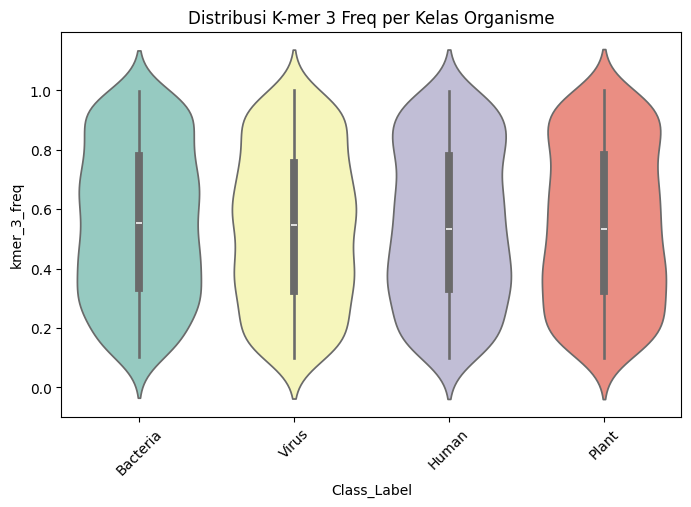

In [416]:

# Distribusi kmer_3_freq per Class_Label
plt.figure(figsize=(8,5))
sns.violinplot(x="Class_Label", y="kmer_3_freq", data=df, palette="Set3")
plt.title("Distribusi K-mer 3 Freq per Kelas Organisme")
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil EDA menggunakan violin plot, distribusi kmer_3_freq pada semua kelas organisme (Bacteria, Virus, Human, Plant) tampak memiliki pola yang mirip, dengan rentang nilai dari rendah (~0.1) hingga tinggi (~1.0). Namun, terdapat sedikit perbedaan pada median dan sebarannya. Bacteria dan Plant cenderung memiliki median kmer_3_freq lebih tinggi, sementara Virus menunjukkan distribusi yang lebih menyebar ke bawah sehingga banyak sampel dengan nilai frekuensi rendah. Human berada di posisi tengah dengan distribusi yang cukup seimbang. Hal ini menunjukkan bahwa meskipun triplet (3-mer) muncul di semua organisme, tingkat intensitas kemunculannya dapat membantu membedakan antar kelas.

## Feature Engineering

### i. Handling Cardinality

In [417]:
# Cek cardinality dari dataset

list_col = []

for col in df:
    n_unique = df[col].nunique()
    unique_vals = df[col].unique()
    list_col.append({
        'Feature': col,
        'Unique Values': n_unique,
        'Unique Sample Values': unique_vals
    })


cardinality = pd.DataFrame(list_col)

# Set pandas option to avoid truncating column content
pd.set_option('display.max_colwidth', None)

# Sort by 'Unique Values' descending
cardinality = cardinality.sort_values(by='Unique Values', ascending=False).reset_index(drop=True)

# Display the result
display(cardinality)

Feature  Unique Values  \
0         Sample_ID           3000   
1          Sequence           3000   
2       kmer_3_freq            872   
3        GC_Content             33   
4        AT_Content             33   
5             Num_T             32   
6             Num_C             32   
7             Num_A             30   
8             Num_G             30   
9       Class_Label              4   
10     Disease_Risk              3   
11    Mutation_Flag              2   
12  Sequence_Length              1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Kolom Sample_ID berisi penanda identitas unik untuk setiap sampel DNA namun isinya tidak relevan untuk Model building yang selanjutnya akan di drop.
Untuk kolom Sequence wajar mempunyai cardinality yang tinggi karena setiap urutan angka dan variasi merepresentasikan sequence DNA yang unik dan selalu berbeda setiap saatnya, namun sequence ini sebenarnya juga sudah di representasikan oleh kmer_3_freq(Rata-rata frekuensi kemunculan 3-mer (triplet), yaitu potongan DNA sepanjang 3 basa (misalnya ATG, CGA)), GC_Content, AT_Content, dsb, Sequence mentah ini akan di drop juga

In [418]:
# Drop kolom CUST_ID
df = df.drop(columns=['Sample_ID', 'Sequence'])

df

,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label,Disease_Risk
0,50.0,50.0,100,22,28,19,31,0.986,0,Bacteria,High
1,45.0,55.0,100,27,28,22,23,0.486,1,Virus,Medium
2,51.0,49.0,100,26,23,30,21,0.367,1,Bacteria,Low
3,55.0,45.0,100,28,17,23,32,0.404,0,Human,Medium
4,46.0,54.0,100,24,30,25,21,0.818,0,Human,High
...,...,...,...,...,...,...,...,...,...,...,...
2995,46.0,54.0,100,30,24,27,19,0.786,1,Plant,Medium
2996,49.0,51.0,100,28,23,24,25,0.831,0,Plant,Medium
2997,53.0,47.0,100,21,26,30,23,0.140,0,Virus,Medium
2998,46.0,54.0,100,26,28,25,21,0.685,0,Plant,Medium


Nilai pada kolom `Mutation_Flag` merupakan nilai biner(yes/no) yang menandakan apakah DNA tersebut bermutasi yang ditandai dengan 1 jika terjadi mutasi dan 0 jika tidak, maka selanjutnya data ini akan diubah menjadi tipe data string

In [419]:
df['Mutation_Flag'] = df['Mutation_Flag'].astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GC_Content       3000 non-null   float64
 1   AT_Content       3000 non-null   float64
 2   Sequence_Length  3000 non-null   int64  
 3   Num_A            3000 non-null   int64  
 4   Num_T            3000 non-null   int64  
 5   Num_C            3000 non-null   int64  
 6   Num_G            3000 non-null   int64  
 7   kmer_3_freq      3000 non-null   float64
 8   Mutation_Flag    3000 non-null   object 
 9   Class_Label      3000 non-null   object 
 10  Disease_Risk     3000 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 257.9+ KB


### ii. Split X(Features) and Y(target)

Target dari Model ini adalah untuk mengetahui apakah DNA berpotensi mutasi, maka Y nya akan menggunakan kolom `Mutation_Flag`

In [420]:
#Splitting antara X dan y

x = df.drop(columns=["Mutation_Flag"])
y = df["Mutation_Flag"].astype(int)

x

,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Class_Label,Disease_Risk
0,50.0,50.0,100,22,28,19,31,0.986,Bacteria,High
1,45.0,55.0,100,27,28,22,23,0.486,Virus,Medium
2,51.0,49.0,100,26,23,30,21,0.367,Bacteria,Low
3,55.0,45.0,100,28,17,23,32,0.404,Human,Medium
4,46.0,54.0,100,24,30,25,21,0.818,Human,High
...,...,...,...,...,...,...,...,...,...,...
2995,46.0,54.0,100,30,24,27,19,0.786,Plant,Medium
2996,49.0,51.0,100,28,23,24,25,0.831,Plant,Medium
2997,53.0,47.0,100,21,26,30,23,0.140,Virus,Medium
2998,46.0,54.0,100,26,28,25,21,0.685,Plant,Medium


### iii. Splitting Train and Test

In [421]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42,)
print('Train Size', x_train.shape)
print('Test Size', x_test.shape)

Train Size (2400, 10)
Test Size (600, 10)


### iv. Handling Missing Values

In [422]:
df.isnull().sum()

GC_Content         0
AT_Content         0
Sequence_Length    0
Num_A              0
Num_T              0
Num_C              0
Num_G              0
kmer_3_freq        0
Mutation_Flag      0
Class_Label        0
Disease_Risk       0
dtype: int64

Tidak ada missing value pada dataset ini

### v. Handling Outlier

In [423]:
#check distribution form skewness
num_cols = list(x_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, round(x_train[col].skew(),1), np.where(
    (round(x_train[col].skew(),1) <= 0.5) & (round(x_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,GC_Content,0.1,normal
1,AT_Content,-0.1,normal
2,Sequence_Length,0.0,normal
3,Num_A,0.1,normal
4,Num_T,0.2,normal
5,Num_C,0.1,normal
6,Num_G,0.1,normal
7,kmer_3_freq,0.0,normal


Setiap kolom tidak bersifat skew, maka bisa diasumsikan sebaran datanya normal

In [424]:
# List kosong untuk di masukkan data
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  #cek upper dan lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = x_train[col].quantile(0.75) - x_train[col].quantile(0.25)
    lower_boundary = x_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = x_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = x_train[col].mean() - 3* x_train[col].std()
    upper_boundary = x_train[col].mean() + 3* x_train[col].std()
  # Masukkan ke list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  total_out = ((len(x_train[x_train[col] > upper_boundary]) / len(x_train) * 100) + (len(x_train[x_train[col] < lower_boundary]) / len(x_train) * 100))
  percent_total_outlier.append(total_out)

outliers = pd.DataFrame({
    'column': column,
    #Hasil dibulatkan
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,GC_Content,65.45,34.96,0.08
1,AT_Content,65.04,34.55,0.08
2,Sequence_Length,100.00,100.00,0.00
3,Num_A,38.02,11.92,0.17
4,Num_T,37.77,11.89,0.46
5,Num_C,38.12,11.98,0.25
6,Num_G,38.10,12.21,0.25
7,kmer_3_freq,1.33,-0.23,0.00


Persentase outlier dari setiap kolom juga sangat rendah, semua dibawah 1% maka bisa diabaikan saja dan tidak dilakukan handling outlier.

### vi. Feature Selection

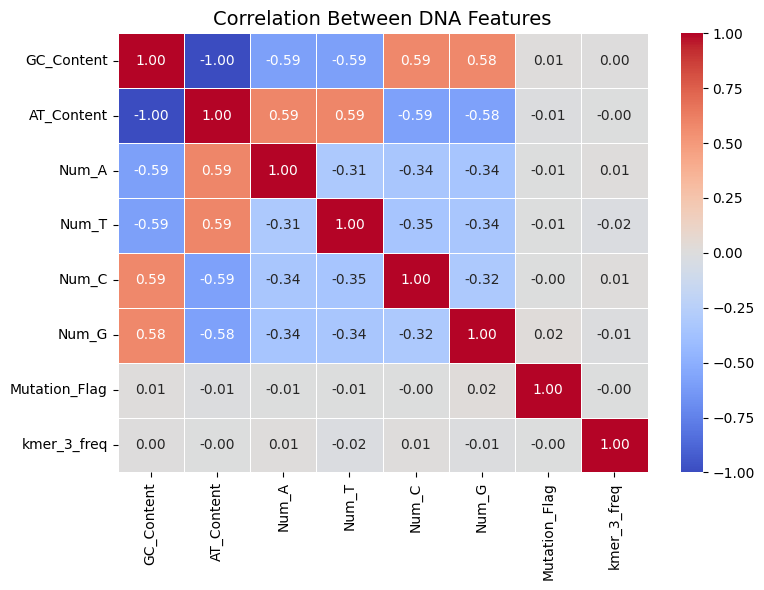

In [425]:

# --- Pilih kolom numerik yang relevan ---
numeric_cols = [
    'GC_Content', 
    'AT_Content',
    'Num_A', 'Num_T', 'Num_C', 'Num_G', 'Mutation_Flag',
    'kmer_3_freq'
]

df_numeric = df[numeric_cols]

# --- Hitung korelasi antar fitur numerik ---
corr = df_numeric.corr(method="pearson")

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Between DNA Features", fontsize=14)
plt.tight_layout()
plt.show()


In [426]:
# Feature selection kolom kategori
p_values = []
interpretasi = []
cols = []

for col in x_train:
  corr_coef, p_value = kendalltau(x_train[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p-value': p_values,
              'hasil': interpretasi})

,nama kolom,p-value,hasil
0,GC_Content,0.866417,ga ada korelasi
1,AT_Content,0.866417,ga ada korelasi
2,Sequence_Length,NaN,ga ada korelasi
3,Num_A,0.801044,ga ada korelasi
4,Num_T,0.555043,ga ada korelasi
5,Num_C,0.591135,ga ada korelasi
6,Num_G,0.692009,ga ada korelasi
7,kmer_3_freq,0.948095,ga ada korelasi
8,Class_Label,0.608553,ga ada korelasi
9,Disease_Risk,0.529710,ga ada korelasi


Berdasarkan hasil uji korelasi, seluruh fitur yang diuji (GC_Content, AT_Content, Num_A, Num_T, Num_C, Num_G, kmer_3_freq, Class_Label, dan Disease_Risk) menunjukkan tidak ada hubungan signifikan secara statistik dengan target (Mutation_Flag), terlihat dari nilai p-value yang relatif tinggi.

Namun, dalam konteks machine learning supervised classification, hal ini tidak berarti fitur tidak berguna. Korelasi linier hanya mengukur hubungan sederhana, sedangkan model klasifikasi (misalnya Random Forest, XGBoost, SVM) dapat menangkap pola non-linear atau interaksi antar fitur yang mungkin relevan.

Oleh karena itu, fitur akan tetap dipilih dengan justifikasi:

- Semua fitur biologis tetap digunakan (GC_Content, AT_Content, Num_A, Num_T, Num_C, Num_G, kmer_3_freq), karena masing-masing mewakili karakteristik penting DNA.

- Class_Label dan Disease_Risk juga layak dipertahankan, karena keduanya bisa memuat informasi kategorikal yang membantu membedakan pola mutasir

Namun, Sequence_Length hanya punya satu nilai unik di seluruh dataset (artinya konstan), yang akan dihapus dari fitur.
Karena,
- Fitur konstan tidak memberikan informasi untuk membedakan antar sampel.
- Model machine learning akan menganggapnya sebagai “noise” atau variabel yang tidak berguna.
- Dengan menghapus fitur konstan, proses training jadi lebih efisien tanpa kehilangan informasi penting.
Maka Sequence_Length → drop karena tidak ada variasi.

Fitur lain tetap dipertahankan.

In [427]:
x_train = x_train.drop(columns=['Sequence_Length'])
x_test = x_test.drop(columns=['Sequence_Length'])



In [428]:
# Munculkan kolom numerik dan kategori
num_col = x_train.select_dtypes(include = np.number).columns.tolist()

cat_ohe = ['Class_Label']
cat_ord = ['Disease_Risk']

#print('Numeric Columns : ', num_col)
#print('Categorical Columns : ', cat_ohe, cat_ord)
cat_ohe


['Class_Label']

> Splitting Numerical and Categorical Columns

### vii. Scalling and Encoding

Saya menggunakan One-Hot Encoder untuk Class_Label karena bersifat nominal tanpa urutan, Ordinal Encoder untuk Disease_Risk karena memiliki urutan (Low < Medium < High), serta StandardScaler untuk fitur numerik agar semua variabel berada pada skala yang sebanding, sehingga model berbasis jarak maupun linear dapat belajar lebih stabil dan akurat.

In [429]:
# Encoding Kolom Numerikal
pipe_num = make_pipeline(StandardScaler()) 

ordinal_mapping = [["Low","Medium","High"]]


# Scaling Kolom kategorikal
pipe_cat_ohe = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
pipe_cat_ord = make_pipeline(OrdinalEncoder(categories=ordinal_mapping))

preprocessor = ColumnTransformer([('numerical', pipe_num, num_col),
                                ('class_cat', pipe_cat_ohe, cat_ohe),
                                ('ordinal_cat', pipe_cat_ord, cat_ord)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['GC_Content', 'AT_Content', 'Num_A', 'Num_T',
                                  'Num_C', 'Num_G', 'kmer_3_freq']),
                                ('class_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Class_Label']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]))]),
                                 ['Disease_Risk'])])

In [430]:
tree_preprocessor = ColumnTransformer([
    ('numerical', 'passthrough', num_col),
    ('class_cat', pipe_cat_ohe, cat_ohe),
    ('ordinal_cat', pipe_cat_ord, cat_ord)
])
tree_preprocessor

ColumnTransformer(transformers=[('numerical', 'passthrough',
                                 ['GC_Content', 'AT_Content', 'Num_A', 'Num_T',
                                  'Num_C', 'Num_G', 'kmer_3_freq']),
                                ('class_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Class_Label']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]))]),
                                 ['Disease_Risk'])])

## Model Definition

Saya akan mencoba berbagai model untuk mencari model yang paling sesuai dengan hasil terbaik untuk hasil ini, beberapa pertimbangan model yang akan digunakan adalah :
- Decision Tree
- Random Forest
- KNN
- SVM
- XGBoost

> Decision Tree

In [431]:
# pipeline for Decision Tree


model_dtree = make_pipeline(tree_preprocessor, DecisionTreeClassifier(random_state=42))

print('Pipeline steps : ', model_dtree.steps)
model_dtree

Pipeline steps :  [('columntransformer', ColumnTransformer(transformers=[('numerical', 'passthrough',
                                 ['GC_Content', 'AT_Content', 'Num_A', 'Num_T',
                                  'Num_C', 'Num_G', 'kmer_3_freq']),
                                ('class_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Class_Label']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High']]))]),
                                 ['Disease_Risk'])])), ('decisiontreeclassifier', DecisionTreeClassifier(random

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['GC_Content', 'AT_Content',
                                                   'Num_A', 'Num_T', 'Num_C',
                                                   'Num_G', 'kmer_3_freq']),
                                                 ('class_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Class_Label']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['Disease_Risk'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

> Random Forest

In [432]:
model_rf = make_pipeline(preprocessor,RandomForestClassifier(random_state=42))
print('Pipeline steps : ', model_rf.steps)
model_rf

Pipeline steps :  [('columntransformer', ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['GC_Content', 'AT_Content', 'Num_A', 'Num_T',
                                  'Num_C', 'Num_G', 'kmer_3_freq']),
                                ('class_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Class_Label']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              '

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['GC_Content', 'AT_Content',
                                                   'Num_A', 'Num_T', 'Num_C',
                                                   'Num_G', 'kmer_3_freq']),
                                                 ('class_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Class_Label']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['Disease_Risk'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

> KNN

In [433]:
model_knn = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors=5)) # default k=5
print('Pipeline steps : ', model_knn.steps)
model_knn


Pipeline steps :  [('columntransformer', ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['GC_Content', 'AT_Content', 'Num_A', 'Num_T',
                                  'Num_C', 'Num_G', 'kmer_3_freq']),
                                ('class_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Class_Label']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              '

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['GC_Content', 'AT_Content',
                                                   'Num_A', 'Num_T', 'Num_C',
                                                   'Num_G', 'kmer_3_freq']),
                                                 ('class_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Class_Label']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['Disease_Risk'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

> SVM

In [434]:
model_svm = make_pipeline(
    preprocessor,
    SVC(probability=True,random_state=42))
print('Pipeline steps : ', model_svm.steps)
model_svm


Pipeline steps :  [('columntransformer', ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['GC_Content', 'AT_Content', 'Num_A', 'Num_T',
                                  'Num_C', 'Num_G', 'kmer_3_freq']),
                                ('class_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Class_Label']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              '

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['GC_Content', 'AT_Content',
                                                   'Num_A', 'Num_T', 'Num_C',
                                                   'Num_G', 'kmer_3_freq']),
                                                 ('class_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Class_Label']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['Disease_Risk'])])),
                ('svc', SVC(probability=True, random_state=42))])

> XGBoost

In [435]:
model_xgb = make_pipeline(preprocessor,
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ))
print('Pipeline steps : ', model_xgb.steps)
model_xgb

Pipeline steps :  [('columntransformer', ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['GC_Content', 'AT_Content', 'Num_A', 'Num_T',
                                  'Num_C', 'Num_G', 'kmer_3_freq']),
                                ('class_cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Class_Label']),
                                ('ordinal_cat',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              '

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['GC_Content', 'AT_Content',
                                                   'Num_A', 'Num_T', 'Num_C',
                                                   'Num_G', 'kmer_3_freq']),
                                                 ('class_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Class_Label']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('o...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

## Model Training

In [436]:
# Train .fit model
model_dtree.fit(x_train, y_train)
model_rf.fit(x_train, y_train)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_xgb.fit(x_train, y_train)

/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['GC_Content', 'AT_Content',
                                                   'Num_A', 'Num_T', 'Num_C',
                                                   'Num_G', 'kmer_3_freq']),
                                                 ('class_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Class_Label']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('o...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

### Cross Validation

In [437]:
# cross val score Decision Tree
result_dtree = cross_val_score(model_dtree, x_train, y_train,
                                scoring= 'roc_auc',
                                cv = 5)
print('mean: ', result_dtree.mean())
print('std: ', result_dtree.std())

# cross validate Decision Tree
result_dtree = cross_validate(model_dtree, x_train, y_train,
                               scoring= 'roc_auc',
                              cv = 5, return_train_score= True)

pd.DataFrame(result_dtree)

mean:  0.5092119293159025
std:  0.01825615681605306


,fit_time,score_time,test_score,train_score
0,0.009839,0.001711,0.491667,1.0
1,0.007315,0.001670,0.487500,1.0
2,0.007766,0.001673,0.508333,1.0
3,0.007952,0.001745,0.522917,1.0
4,0.008042,0.001628,0.535643,1.0


Hasil cross validation Decision Tree punya rata-rata skor test sekitar 0.51 dengan variasi kecil, sedangkan skor train mencapai 1.0. Hal ini menandakan model overfitting, karena sangat baik pada data train namun lemah pada data test. Artinya, model perlu perbaikan melalui regularisasi, tuning parameter, atau metode lain agar performa di data baru lebih baik.

In [438]:
# cross validate Random Forest
result_rf = cross_val_score(model_rf, x_train, y_train,
                                scoring= 'roc_auc',
                                cv = 5)
print('mean: ', result_rf.mean())
print('std: ', result_rf.std())
# cross validate Random Forest
result_rf = cross_validate(model_rf, x_train, y_train,
                               scoring= 'roc_auc',
                              cv = 5, return_train_score= True)

pd.DataFrame(result_rf)

mean:  0.4951598184032419
std:  0.021688867411694825


,fit_time,score_time,test_score,train_score
0,0.138950,0.007495,0.509132,1.0
1,0.140888,0.007485,0.465174,1.0
2,0.141845,0.007252,0.481319,1.0
3,0.142149,0.007461,0.492474,1.0
4,0.140021,0.007288,0.527700,1.0


Hasil cross validation Random Forest menunjukkan rata-rata skor test sekitar 0.50 dengan variasi antar fold cukup kecil (std ~0.02), sementara skor train tetap 1.0. Kondisi ini kembali menandakan model overfitting, karena sangat baik di data train namun performa di data test hanya mendekati tebakan acak

In [439]:
# cross validate KNN
result_knn = cross_val_score(model_knn, x_train, y_train,
                                scoring= 'roc_auc',
                                cv = 5)
print('mean: ', result_knn.mean())
print('std: ', result_knn.std())
# cross validate KNN
result_knn = cross_validate(model_knn, x_train, y_train,
                               scoring= 'roc_auc',
                              cv = 5, return_train_score= True)

pd.DataFrame(result_knn)

mean:  0.5079966608517992
std:  0.01886332315221863


,fit_time,score_time,test_score,train_score
0,0.002936,0.004404,0.505321,0.746936
1,0.003026,0.004411,0.517127,0.746223
2,0.002957,0.004462,0.482812,0.764413
3,0.002892,0.004157,0.496398,0.749804
4,0.002907,0.004222,0.538325,0.740537


Hasil cross validation KNN menunjukkan rata-rata skor test sekitar 0.51 dengan standar deviasi kecil (~0.019), artinya performa model pada data test cukup konsisten di tiap fold. Skor train berada di kisaran 0.74–0.76, lebih tinggi dibanding skor test tetapi tidak ekstrem, sehingga model tidak mengalami overfitting parah seperti sebelumnya. Kesimpulannya, model ini sudah lebih seimbang antara data train dan test, meskipun akurasi masih mendekati 50%.

In [440]:
# cross validate SVM
result_svm = cross_val_score(model_svm, x_train, y_train,
                                scoring= 'roc_auc',
                                cv = 5)
print('mean: ', result_svm.mean())
print('std: ', result_svm.std())
# cross validate SVM
result_svm = cross_validate(model_svm, x_train, y_train,
                               scoring= 'roc_auc',
                              cv = 5, return_train_score= True)

pd.DataFrame(result_svm)

mean:  0.5003142129324197
std:  0.023912671078378682


,fit_time,score_time,test_score,train_score
0,0.258183,0.026144,0.546476,0.650183
1,0.256555,0.024566,0.481667,0.659023
2,0.256470,0.025686,0.497830,0.659514
3,0.257311,0.024442,0.482274,0.658546
4,0.254968,0.024005,0.493325,0.655421


Hasil cross validation SVM menunjukkan rata-rata skor test sekitar 0.50 dengan standar deviasi ~0.024, menandakan performa model stabil tapi tidak jauh dari tebakan acak. Skor train berada di kisaran 0.65, sedikit lebih tinggi dari skor test namun masih rendah secara keseluruhan. Kesimpulannya, model ini belum mampu menangkap pola yang baik dari data.

In [441]:
# cross validate XGBoost
result_xgb = cross_val_score(model_xgb, x_train, y_train,
                                scoring= 'roc_auc',
                                cv = 5)
print('mean: ', result_xgb.mean())
print('std: ', result_xgb.std())
# cross validate XGBoost
result_xgb = cross_validate(model_xgb, x_train, y_train,
                               scoring= 'roc_auc',
                              cv = 5, return_train_score= True)

pd.DataFrame(result_xgb)

/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

mean:  0.4907552442919534
std:  0.02909298872854514


/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/miniconda3/envs/h8_env/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:03:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserW

,fit_time,score_time,test_score,train_score
0,0.119611,0.002869,0.504809,0.998222
1,0.134636,0.002983,0.439601,0.995053
2,0.121299,0.002929,0.478524,0.997088
3,0.119942,0.002672,0.520486,0.998622
4,0.118815,0.002851,0.510356,0.995777


Cross Validation XGBoost ini skor train sangat tinggi (~0.995–0.999) sementara skor uji rata-rata hanya sekitar 0.49–0.50. Pola ini jelas menunjukkan overfitting: model mampu belajar hampir sempurna pada data latih, tetapi gagal menggeneralisasi ke data uji sehingga performanya mendekati tebakan acak. Waktu training (fit_time ~0.12s) dan evaluasi (score_time ~0.003s) cukup efisien, artinya masalah bukan pada komputasi, melainkan pada kompleksitas model yang terlalu tinggi terhadap data.

## Model Evaluation

In [442]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Mutation (0)", "Mutation (1)"],
                yticklabels=["No Mutation (0)", "Mutation (1)"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

> Decision Tree Evaluation


===== Decision Tree Train =====
Accuracy: 1.0
Confusion Matrix:
 [[1199    0]
 [   0 1201]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       1.00      1.00      1.00      1201

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



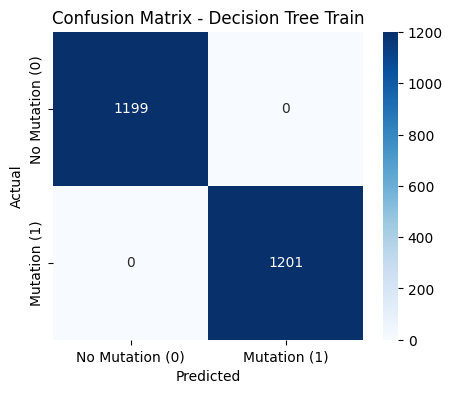


===== Decision Tree Test =====
Accuracy: 0.5366666666666666
Confusion Matrix:
 [[165 146]
 [132 157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.54       311
           1       0.52      0.54      0.53       289

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600



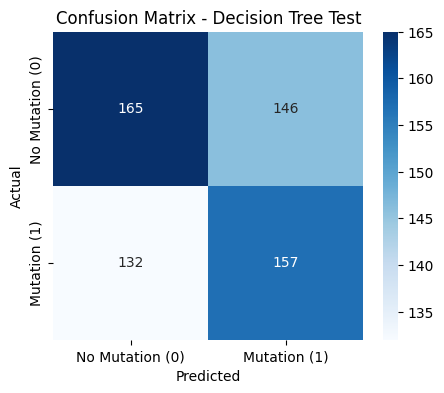

In [443]:
evaluate_model(model_dtree, x_train, y_train, "Decision Tree Train")
evaluate_model(model_dtree, x_test, y_test, "Decision Tree Test")


Model Decision Tree masih sangat overfitting, melihat nilai train yang sempurna sedangkan pada test sangat turun drastis. Model sangat baik pada data train namun lemah pada data test. 

> Random Forest Evaluation


===== Random Forest Train =====
Accuracy: 1.0
Confusion Matrix:
 [[1199    0]
 [   0 1201]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1199
           1       1.00      1.00      1.00      1201

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



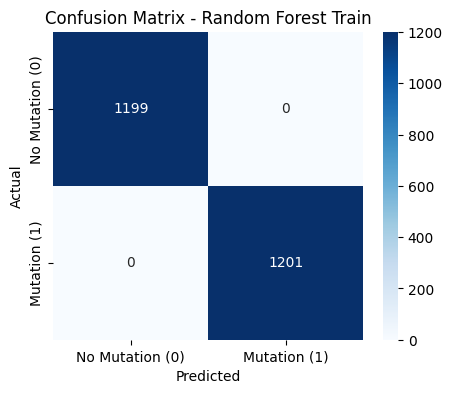


===== Random Forest Test =====
Accuracy: 0.53
Confusion Matrix:
 [[161 150]
 [132 157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.52      0.53       311
           1       0.51      0.54      0.53       289

    accuracy                           0.53       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.53      0.53      0.53       600



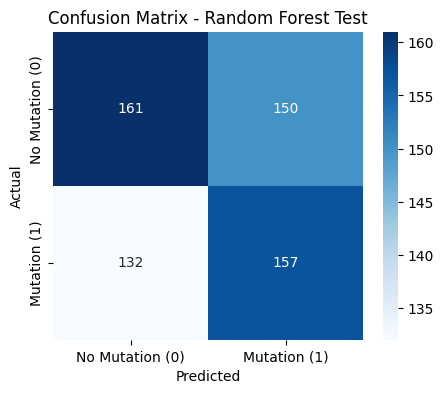

In [444]:
evaluate_model(model_rf, x_train, y_train, "Random Forest Train")
evaluate_model(model_rf, x_test, y_test, "Random Forest Test")


Model Random kembali menandakan overfitting, karena sangat baik di data train namun performa di data test hanya mendekati tebakan acak namun variasi antar fold cukup kecil. Namun Random Forest merupakan model yang cukup baik dalam menangkap hubungan non-linear antar fitur.

> KNN Evaluation


===== KNN Train =====
Accuracy: 0.68
Confusion Matrix:
 [[794 405]
 [363 838]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67      1199
           1       0.67      0.70      0.69      1201

    accuracy                           0.68      2400
   macro avg       0.68      0.68      0.68      2400
weighted avg       0.68      0.68      0.68      2400



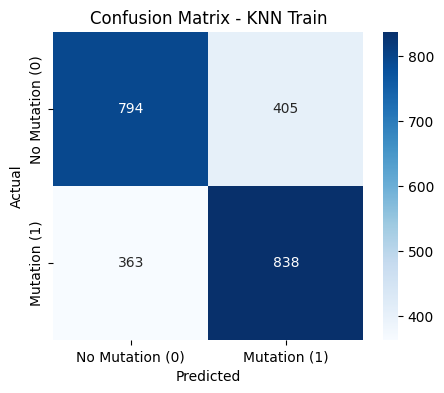


===== KNN Test =====
Accuracy: 0.5183333333333333
Confusion Matrix:
 [[148 163]
 [126 163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51       311
           1       0.50      0.56      0.53       289

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.52       600
weighted avg       0.52      0.52      0.52       600



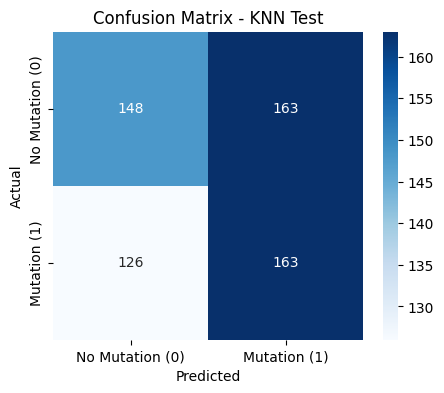

In [445]:
evaluate_model(model_knn, x_train, y_train, "KNN Train")
evaluate_model(model_knn, x_test, y_test, "KNN Test")


Model KNN pada data test cukup konsisten di tiap fold. Skor train berada lebih tinggi dibanding skor test tetapi tidak ekstrem, sehingga model tidak mengalami overfitting parah seperti sebelumnya. Model ini sudah lebih seimbang antara data train dan test.

> SVM Evaluation


===== SVM Train =====
Accuracy: 0.6008333333333333
Confusion Matrix:
 [[733 466]
 [492 709]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.60      1199
           1       0.60      0.59      0.60      1201

    accuracy                           0.60      2400
   macro avg       0.60      0.60      0.60      2400
weighted avg       0.60      0.60      0.60      2400



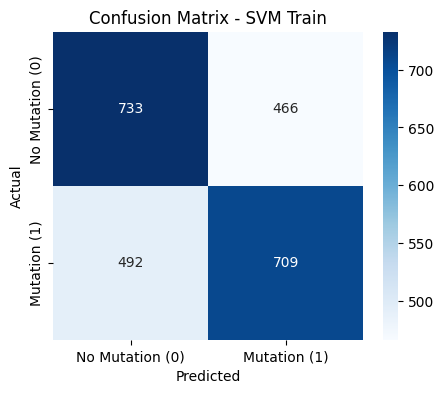


===== SVM Test =====
Accuracy: 0.5116666666666667
Confusion Matrix:
 [[155 156]
 [137 152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.50      0.51       311
           1       0.49      0.53      0.51       289

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



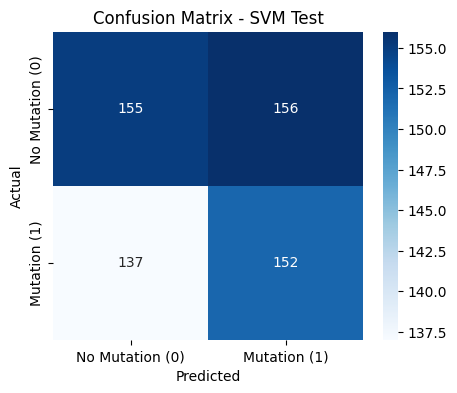

In [446]:
evaluate_model(model_svm, x_train, y_train, "SVM Train")
evaluate_model(model_svm, x_test, y_test, "SVM Test")


Model SVM terlihat stabil tapi tidak jauh dari tebakan acak. Skor train sedikit lebih tinggi dari skor test namun masih rendah secara keseluruhan. Kesimpulannya, model ini belum mampu menangkap pola yang baik dari data.

> XGBoost Evaluation


===== XGBoost Train =====
Accuracy: 0.97
Confusion Matrix:
 [[1161   38]
 [  34 1167]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1199
           1       0.97      0.97      0.97      1201

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



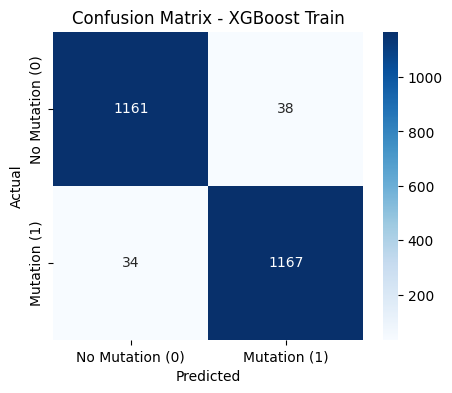


===== XGBoost Test =====
Accuracy: 0.515
Confusion Matrix:
 [[153 158]
 [133 156]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.49      0.51       311
           1       0.50      0.54      0.52       289

    accuracy                           0.52       600
   macro avg       0.52      0.52      0.51       600
weighted avg       0.52      0.52      0.51       600



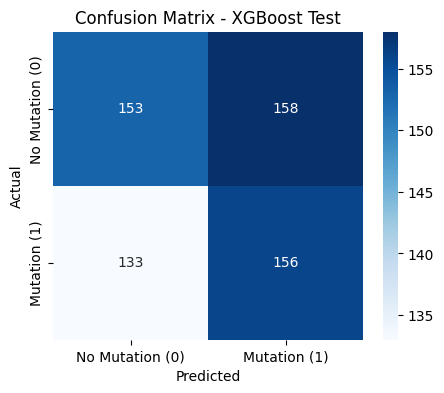

In [447]:
evaluate_model(model_xgb, x_train, y_train, "XGBoost Train")
evaluate_model(model_xgb, x_test, y_test, "XGBoost Test")

Model XGBoost jelas menunjukkan overfitting: model mampu belajar hampir sempurna pada data train, tetapi gagal menggeneralisasi ke data test sehingga performanya mendekati tebakan acak.

In [448]:
# Fungsi untuk roc_auc
def label_roc_auc(y_true, y_pred_proba):
    score = roc_auc_score(y_true, y_pred_proba)
    if score > 0.9:
        label = "Good"
    elif 0.8 <= score <= 0.9:
        label = "Fair"
    elif 0.7 <= score < 0.8:
        label = "Decent"
    elif 0.6 <= score < 0.7:
        label = "Not Great"
    else:
        label = "Poor"   
    return score, label
# Fungsi evaluasi model
def evaluate(model, X_eval, y_eval, name):
    y_pred = model.predict(X_eval)
    y_prob = model.predict_proba(X_eval)[:,1]
    
    # dapatkan score & label dari fungsi label_roc_auc
    score, grade = label_roc_auc(y_eval, y_prob)
    
    out = {
        "Model": name,
        "Accuracy": accuracy_score(y_eval, y_pred),
        "ROC-AUC": score,
        "ROC Grade": grade
    }
    return out

In [449]:
evaluation = [
    evaluate(model_dtree, x_test, y_test, "Decision Tree"),
    evaluate(model_rf, x_test, y_test, "Random Forest"),
    evaluate(model_knn, x_test, y_test, "KNN"),
    evaluate(model_svm, x_test, y_test, "SVM"),
    evaluate(model_xgb, x_test, y_test, "XGBoost")
]

pd.DataFrame(evaluation).sort_values(["ROC-AUC"], ascending=False)

,Model,Accuracy,ROC-AUC,ROC Grade
0,Decision Tree,0.536667,0.536900,Poor
1,Random Forest,0.530000,0.536621,Poor
4,XGBoost,0.515000,0.518397,Poor
2,KNN,0.518333,0.518013,Poor
3,SVM,0.511667,0.487800,Poor


Berdasarkan hasil evaluasi awal dengan membandingkan 5 jenis model,

Model `Random Forest` dipilih sebagai model utama untuk tahap selanjutnya. Pemilihan ini didasarkan pada performa akurasi yang relatif lebih tinggi dibandingkan model lain, meskipun nilai ROC-AUC masih dalam kategori rendah. `Random Forest` dinilai lebih unggul karena mampu menangani data dengan kombinasi fitur numerik dan kategorikal, serta memiliki kemampuan mengurangi risiko overfitting melalui mekanisme bagging dan pemilihan fitur secara acak. Oleh karena itu, langkah selanjutnya adalah melakukan hyperparameter tuning pada `Random Forest` untuk mengoptimalkan kinerjanya dan meningkatkan kemampuan prediksi terhadap target Mutation_Flag.

## Hyperparameter Tuning
Chosen Model = `Random Forest`

In [ ]:


# pipeline: model_rf sudah ada
param_dist = {
    "randomforestclassifier__n_estimators": [100, 200, 500, 1000, 1500],  # default 100 ikut masuk
    "randomforestclassifier__max_depth": [None, 10, 20, 40],              # default None ikut
    "randomforestclassifier__min_samples_split": [2, 5, 10, 20],          # default 2 ikut
    "randomforestclassifier__min_samples_leaf": [1, 2, 4, 8],             # default 1 ikut
    "randomforestclassifier__max_features": ["sqrt", "log2", None],       # default "sqrt" ikut
    "randomforestclassifier__bootstrap": [True, False]                    # default True ikut
}

# RandomizedSearchCV
rf_tuned = RandomizedSearchCV(
    model_rf,                     
    param_distributions=param_dist,
    n_iter=50,                     # sampling 50 kombinasi saja
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# fit ke training data
rf_tuned.fit(x_train, y_train)

# best parameters & score
print("Best Params:", rf_tuned.best_params_)
print("Best CV ROC-AUC:", rf_tuned.best_score_)

# evaluasi di test set
y_pred_rf = rf_tuned.predict(x_test)
y_proba_rf = rf_tuned.predict_proba(x_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__max_features': None, 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__bootstrap': False}
Best CV ROC-AUC: 0.5214044961959216
Test Accuracy: 0.5366666666666666
Test ROC-AUC: 0.5711289622714983



===== Random Forest Train =====
Accuracy: 0.725
Confusion Matrix:
 [[976 223]
 [437 764]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75      1199
           1       0.77      0.64      0.70      1201

    accuracy                           0.72      2400
   macro avg       0.73      0.73      0.72      2400
weighted avg       0.73      0.72      0.72      2400



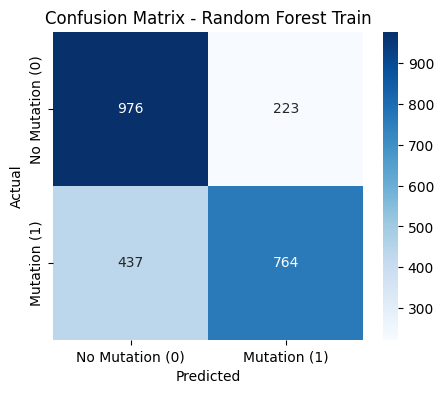


===== Random Forest Test =====
Accuracy: 0.5366666666666666
Confusion Matrix:
 [[191 120]
 [158 131]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.61      0.58       311
           1       0.52      0.45      0.49       289

    accuracy                           0.54       600
   macro avg       0.53      0.53      0.53       600
weighted avg       0.54      0.54      0.53       600



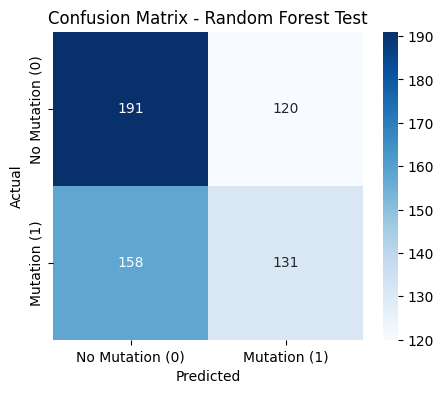

In [451]:
evaluate_model(rf_tuned, x_train, y_train, "Random Forest Train")
evaluate_model(rf_tuned, x_test, y_test, "Random Forest Test")


In [452]:
evaluate(rf_tuned, x_test, y_test, "Random Forest Tuning")

{'Model': 'Random Forest Tuning',
 'Accuracy': 0.5366666666666666,
 'ROC-AUC': 0.5711289622714983,
 'ROC Grade': 'Poor'}

Model ini masih jauh dari sempurna, namun setelah dilakukan Hyperparamater Tuning ada sedikit peningkatan dari masing-masing nilai evaluasi

Kelebihan:
- Model sudah dioptimasi dengan hyperparameter tuning (misalnya n_estimators=1000, max_depth=20, dll.), sehingga cukup stabil.
- Nilai ROC-AUC test (0.57) sedikit lebih baik dibanding rata-rata cross-validation (0.59), artinya model tidak terlalu drop saat diuji di data baru. Model mulai bisa membedakan kelas meski belum optimal.
- Akurasi test 0.54 menunjukkan model bisa memprediksi sedikit lebih baik dari random guess (50%).
- Overfitting berkurang karena train score tidak lagi 1.0 (berdasarkan parameter yang dipilih).

Kekurangan:
- Performa keseluruhan masih rendah (ROC-AUC mendekati 0.5), menandakan model kesulitan membedakan kelas secara signifikan.
- Akurasi hanya sedikit di atas baseline → informasi fitur yang dipakai mungkin belum cukup kuat.
- Random Forest dengan parameter cukup kompleks (1000 trees, depth 20) menghasilkan waktu komputasi tinggi, tetapi peningkatan performa relatif kecil.
- Potensi adanya noise atau fitur kurang relevan membuat model sulit belajar pola yang bermakna.

Kesimpulan: Model sudah stabil tapi masih lemah dalam prediksi. Perlu eksplorasi lebih jauh, misalnya feature engineering (ekstraksi/seleksi fitur baru) karena korelasi antar fiturnya yang sangat lemah.

Rekomendasi : Untuk menghasilkan model yang lebih akurat, bisa ditambahkan data biologis tambahan dari hasil uji laboratoriumnya seperti seperti RNA-seq, epigenetik, proteomik, dan SNP/varian spesifik.
Kombinasi data multi-omics + metadata biologis biasanya jauh lebih kaya untuk model klasifikasi daripada DNA sequence polos saja.

| Aspek Evaluasi        | Model Awal         | Setelah Tuning Random Forest       | Catatan |
|-----------------------|------------------------|------------------------------------|---------|
| **Mean CV Score**     | 0.495                  | 0.521                              | Ada peningkatan meskipun kecil |
| **Std Dev (CV)**      | 0.022                  | –                                  | Awal cukup stabil tapi rendah |
| **Train Score**       | 1.0 (sempurna)         | < 1.0 (tidak ditampilkan detail)   | Overfitting berkurang |
| **Test Accuracy**     | 0.50          | 0.537                              | Sedikit di atas baseline random (0.5) |
| **Test ROC-AUC**      | 0.53         | 0.571                              | Lebih baik dari hasil CV, ada generalisasi |
| **Kompleksitas Model**| Default, overfit       | 1000 trees, depth=20, leaf=8, dsb. | Lebih terkontrol tapi komputasi lebih berat |


## Model Saving

In [455]:
rf_tuned

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['GC_Content',
                                                                                'AT_Content',
                                                                                'Num_A',
                                                                                'Num_T',
                                                                                'Num_C',
                                                                                'Num_G',
                                                                                'kmer_3_freq']),
                                                                              ('class_cat',
                                                                               Pipeline(steps=[('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Class_Label']),...
                   param_distributions={'randomforestclassifier__bootstrap': [True,
                                                                              False],
                                        'randomforestclassifier__max_depth': [None,
                                                                              10,
                                                                              20,
                                                                              40],
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2',
                                                                                 None],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4,
                                                                                     8],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10,
                                                                                      20],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 200,
                                                                                 500,
                                                                                 1000,
                                                                                 1500]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [456]:
with open('final_model.pkl', 'wb') as file:
  pickle.dump(rf_tuned, file)

## Kesimpulan

### Kesimpulan EDA

Dari hasil eksplorasi data, diperoleh beberapa temuan penting. Pertama, distribusi kmer_3_freq menunjukkan bahwa pola triplet DNA muncul di semua organisme, namun intensitasnya sedikit berbeda antar kelas. Hal ini mengindikasikan bahwa pola triplet dapat menjadi ciri penting dalam membedakan sampel dan mendeteksi mutasi. Kedua, distribusi Mutation_Flag relatif seimbang, baik secara keseluruhan maupun di masing-masing kelas organisme (Bacteria, Virus, Human, Plant). Kondisi ini sangat mendukung pembangunan model klasifikasi karena tidak ada masalah class imbalance yang signifikan. Ketiga, analisis hubungan antara Mutation_Flag dengan Disease_Risk menunjukkan bahwa mutasi muncul pada semua tingkat risiko penyakit secara merata, sehingga mutasi bukanlah faktor tunggal yang menentukan level risiko, tetapi tetap relevan sebagai indikator penting. Keempat, distribusi GC_Content pada setiap kategori risiko penyakit (High, Medium, Low) memperlihatkan pola yang serupa, yang berarti GC_Content saja belum cukup kuat sebagai pembeda, namun tetap berkontribusi sebagai salah satu fitur penjelas.

Hal ini menunjukkan bahwa dataset cukup representatif untuk membangun model klasifikasi tanpa masalah class imbalance yang signifikan. Temuan ini dapat mendukung goals yang ingin tercapai, yaitu pengembangan sistem flagging mutasi DNA berbasis machine learning yang mampu mempercepat identifikasi mutasi secara otomatis, sehingga dapat mendukung deteksi dini risiko penyakit, resistensi mikroba, serta meningkatkan efisiensi riset genomik.

### Kesimpulan Keseluruhan

Project ini bertujuan untuk membangun sistem flagging mutasi DNA berbasis machine learning sebagai pendukung analisis genomik di OXE Corp. Dari serangkaian tahapan mulai dari eksplorasi data (EDA), pemilihan model, hingga tuning hyperparameter Random Forest, performa model masih terbatas dengan nilai akurasi dan ROC-AUC yang hanya sedikit lebih baik dari baseline. Meski begitu, tuning berhasil mengurangi overfitting dan membuat model lebih stabil. Hasil ini menunjukkan bahwa kelemahan utama bukan pada algoritma, melainkan pada keterbatasan informasi yang terkandung dalam fitur DNA sequence sederhana yang digunakan saat ini.

**Rekomendasi untuk Laboratorium Biologis**

- Agar sistem prediksi mutasi DNA lebih akurat dan bernilai tambah bagi riset, diperlukan peningkatan kualitas dataset melalui kolaborasi dengan laboratorium biologis. Beberapa langkah strategis yang bisa dilakukan OXE Corp adalah:

- Memperkaya data dengan multi-omics: selain sekuens DNA, tambahkan data RNA-seq, epigenetik, proteomik, dan SNP/varian spesifik yang terbukti lebih informatif untuk mendeteksi mutasi.

- Mengintegrasikan metadata biologis: seperti asal sampel, kondisi klinis, atau faktor lingkungan untuk memberikan konteks tambahan pada prediksi.

- Meningkatkan efisiensi riset: sistem flagging ini dapat digunakan sebagai pre-screening tool untuk mempercepat identifikasi sampel berisiko sebelum dilakukan uji laboratorium lanjutan.

- Nilai bisnis jangka panjang: solusi ini berpotensi mengurangi biaya dan waktu analisis laboratorium, mendukung inovasi layanan diagnostik genomik, serta memperkuat posisi OXE Corp sebagai perusahaan yang menggabungkan teknologi AI + biologi molekuler.

Dengan demikian, meski model awal masih jauh dari sempurna, proyek ini menunjukkan **proof of concept** yang kuat. Dengan dukungan data laboratorium yang lebih kaya, sistem flagging mutasi DNA dapat dikembangkan menjadi platform prediksi yang handal, membantu peneliti dalam deteksi dini risiko penyakit, resistensi mikroba, maupun stabilitas genetik, sekaligus mendorong efisiensi dan inovasi dalam riset genomik OXE Corp.